# Churning bank customers

• Every bank wants to hold their customers for sustaining their business, so is this Anonymous Multinational bank. We have customer data of account holders at Anonymous Multinational Bank with the aim of understanding the customer churn

• Exploring the correlation between variables such as credit score, age, tenure, balance, and geography with customer churn.

• Assess the impact of demographic factors like gender and the presence of credit cards on churn rates.

• Additionally, analyze customer satisfaction scores and complaint resolutions to identify areas for service improvement.

• Utilize your analytical skills to find factors contributing to potential customer churn.

• This project provides an opportunity to enhance customer retention strategies by uncovering patterns and insights within the dataset.


**DATA DESCRIPTION:**

**RowNumber** — corresponds to the record (row) number and has no effect on the output.

**CustomerId** — contains random values and has no effect on customer leaving the bank.

**Surname** — the surname of a customer has no impact on their decision to leave the bank.

**CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography** — a customer’s location can affect their decision to leave the bank.

**Gender** — it’s interesting to explore whether gender plays a role in a customer leaving the bank.

**Age** — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts** — refers to the number of products that a customer has purchased through the bank.

**HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

**IsActiveMember** — active customers are less likely to leave the bank.

**EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited** — whether or not the customer left the bank.

**Complain** — customer has complaint or not.

**Satisfaction Score** — Score provided by the customer for their complaint resolution.

**Card Type** — type of card hold by the customer.

**Points Earned** — the points earned by the customer for using credit card.

In [119]:
# Import all the necessary libraries

import math
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.ticker import PercentFormatter # Pareto chart

from scipy.stats import binom, geom, poisson, expon, norm

from statsmodels.stats import weightstats as stests
from scipy import stats

import statsmodels.api as sm

from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel


from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2
from scipy.stats import chi2_contingency

from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import shapiro
from scipy.stats import levene

from scipy.stats import kruskal

from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [120]:
#Import data and assign it to a dataframe

data = pd.read_csv('Bank-Records.csv')

In [121]:
# Visualize data frame

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [122]:
data.shape

(10000, 18)

In [123]:
data.ndim

2

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [125]:
data.duplicated().sum()

0

In [126]:
data.isnull().sum().sum()

0

In [127]:
data.CustomerId.nunique()

10000

In [128]:
# Let's drop surname and rownumber columns here as we will not ne using them

data.drop(['Surname', 'RowNumber'], axis = 1, inplace = True)

In [129]:
# Descriptve analysis

data.describe(include = 'all')

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


# Summary
- It's a 2 dimensional data table.
- It has 18 columns and 10k rows.
- There are no duplicates or null values.
- Have dropped columns that are not going to be used in this analysis.

# Descriptive Stats
- No much difference in the Mean and Median of Credit Score. No or negligible outliers.
- There 3 unique geographies, out of which 50% of customer are from France.
- There almost equal number of Male and Female Customers.
- The average age of customers is 38.9 years, Median is also very close to this value. But the 75% and max age has huge difference indicating outliers.
- The 75% of customers are of age below 44 years.
- The average tenure is 5 years. No/ less outliers in Tenure.
- The average balance is 76486. Median is varying from this avg and the max balance is too high indicating presence of outliers / non-normal distribution.
- The top 25% customers have very high balance compared to the 75 % of the total customers.
- The average Satisfaction Score is 3 which is also the median. No Outliers.

In [130]:
#create new list with categorical and numerical columns for further analysis along with churned customer data set

cat_col = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
            'Complain', 'Card Type', 'Satisfaction Score', 'Exited']

cat_col1 = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
            'Complain', 'Card Type', 'Satisfaction Score', 'credit_bin']

num_col = ['Age', 'Tenure', 'Balance', 'EstimatedSalary', 'CreditScore', 'Point Earned']

churn = data[data.Exited == 1]

In [131]:
# Let's create bins for continous numerical variable for further analysis

data['CreditScore'].min(), data['CreditScore'].max()

(350, 850)

In [132]:
# Create bins for credit score. each bin has 100 score

bins = [300,400,500,600,700,800,900]
data['credit_bin'] = pd.cut(data['CreditScore'], bins = bins)
data.credit_bin.value_counts()

(600, 700]    3818
(700, 800]    2471
(500, 600]    2423
(800, 900]     645
(400, 500]     624
(300, 400]      19
Name: credit_bin, dtype: int64

# Univariate Analysis

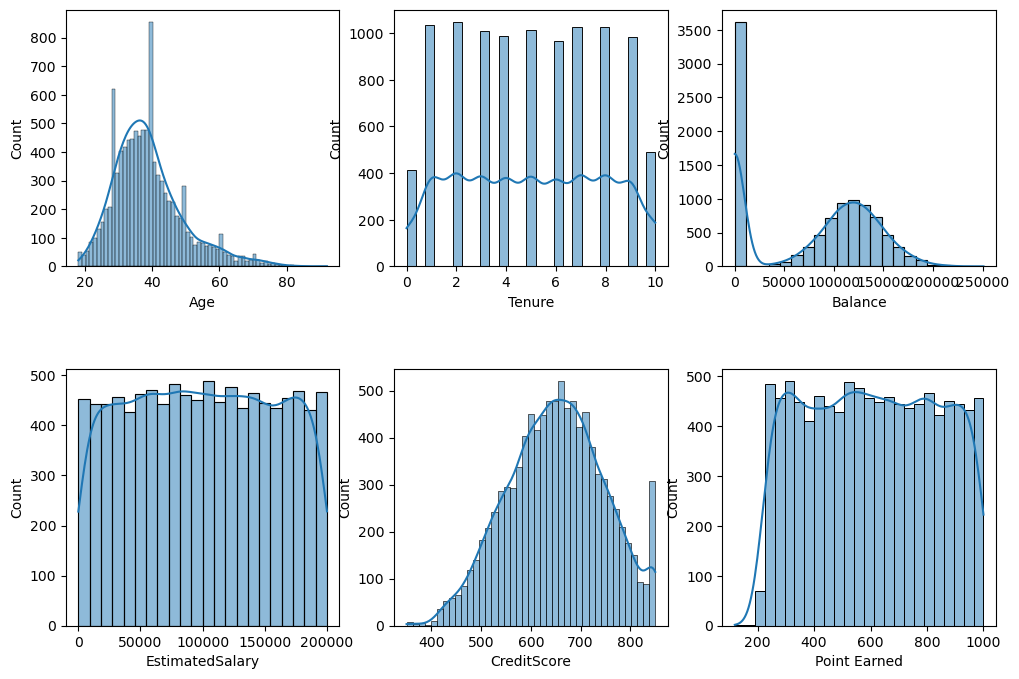

In [133]:
# Histpot to visualize distribution of the data


fig, axis = plt.subplots(2,3, figsize = (12,8))

index = 0
for row in range (2):
    for col in range (3):
        sns.histplot(x = data[num_col[index]], kde = True, ax = axis[row, col])
        index += 1

plt.subplots_adjust(hspace = 0.4, wspace = 0.2)
plt.show()

- Highest number of customers are in the age group below 40
- Least number of customers have 0 and 10 years of Tenure. 2 -9 years of tenure is almost equally distributed
- The highest number of customers have 0 balance uin their account. Least numkber of people have upto 5k and above 2 lac balance in their bank account.
- If we exclude 0 balance accounts, the balance is almost normally distributed.
- Estimated salary and points earned shows almost uniform distribution. From the initial visualization looks like there is no much differenc or impact of it on the customer churn.
- Highest number of people have credit score between 600 to 700.

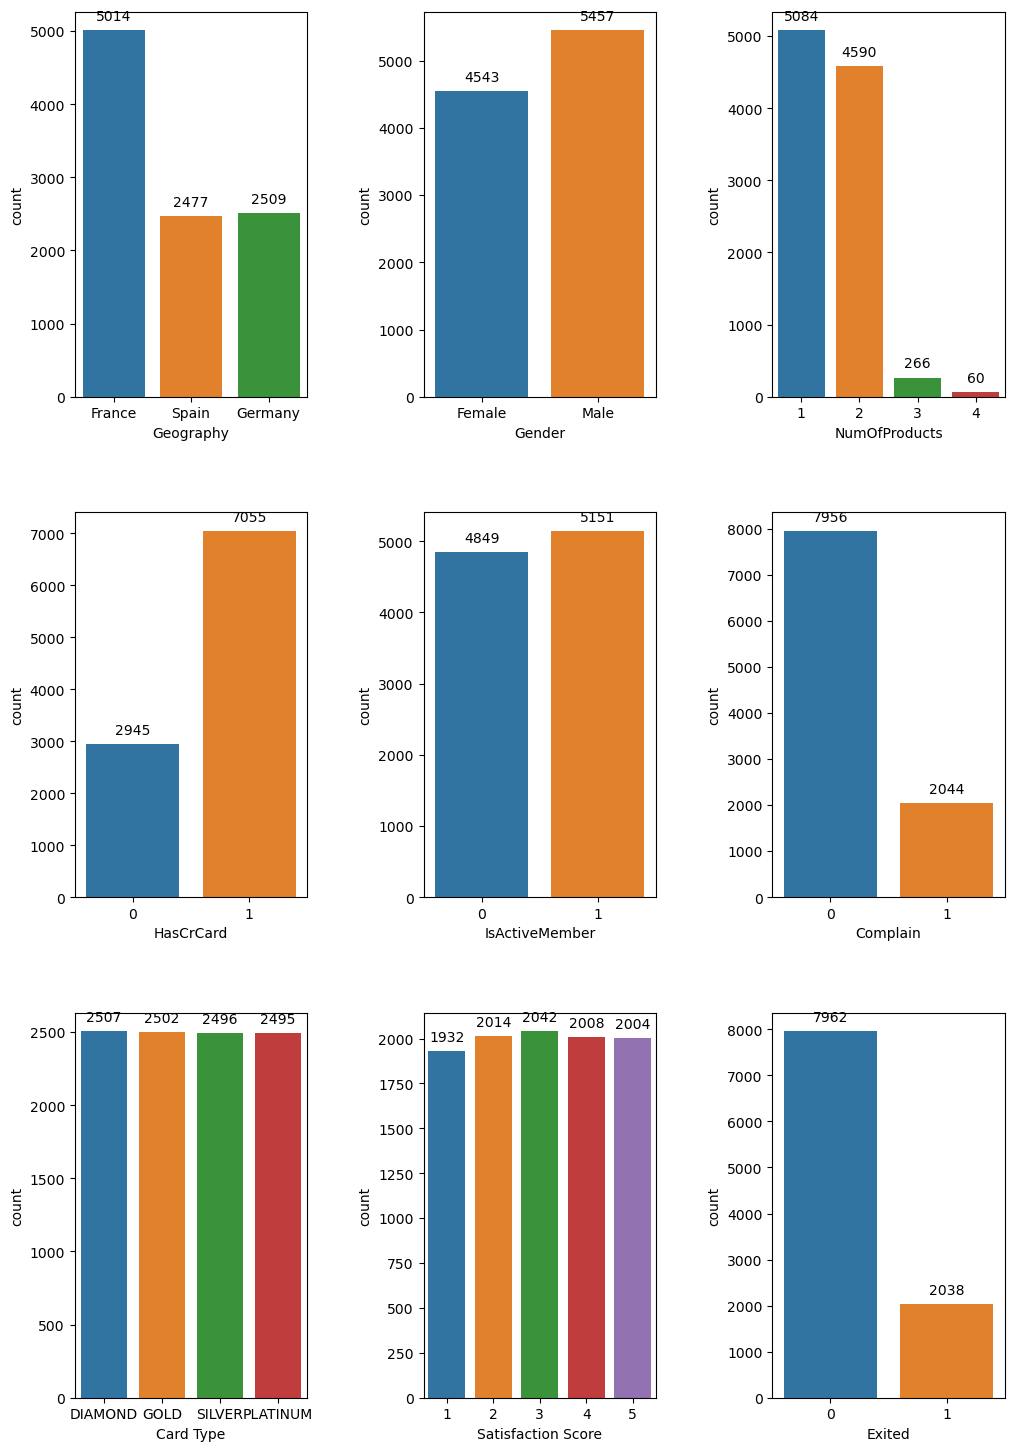

In [134]:
# Comparing categorical variables against their counts

fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(12, 18))

index = 0
for row in range(3):
    for col in range (3):
        ax = sns.countplot(x = data[cat_col[index]],ax = axis[row,col])
        index += 1
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')

plt.subplots_adjust(hspace=0.3, wspace = 0.5)

- Bank has nearly 50% of it's customers from France followed by Spain & Germany (around25% each)
- 54.5% of customers are Male.
- Majority of customers (96%) either have 1 or 2 products
- Almost 70% of customers have Credit Card.
- 51% customers are Active.
- Only 20.4% of the total customers have raised complain in the past.
- Type of card is uniformly distributed.
- Satisfaction Score irrespective of complain looks uniform.
- Out of 10k customers, 20.4% of customers have churned.

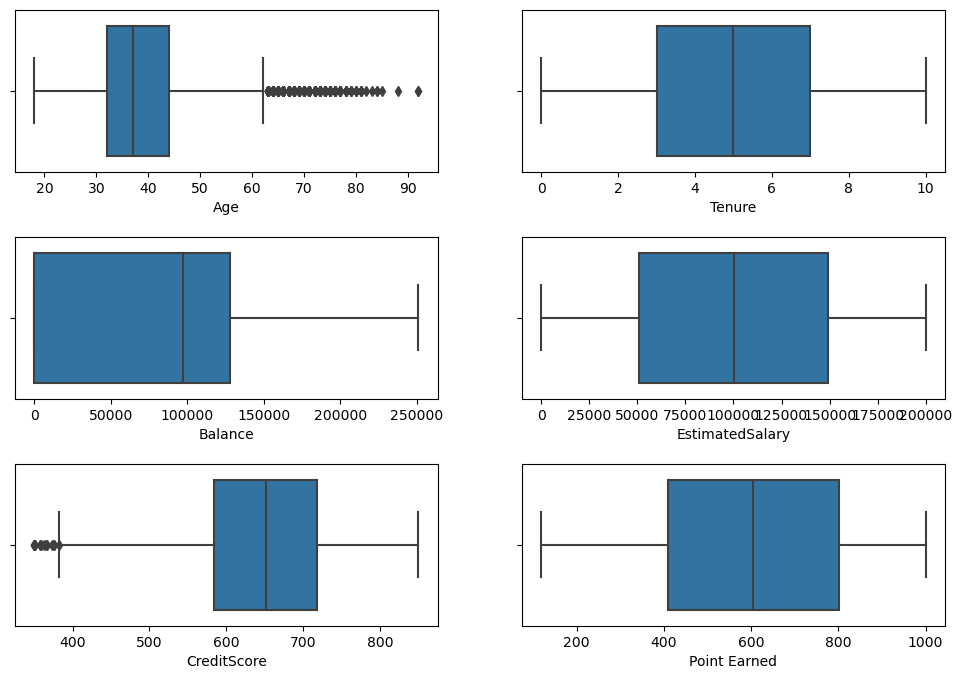

In [135]:
# Check for outliers using boxplot

fig, axis = plt.subplots(3,2, figsize = (12,8))

index = 0
for row in range(3):
    for col in range(2):
        ax = sns.boxplot(x = data[num_col[index]], ax = axis[row, col])
        index += 1
        
plt.subplots_adjust(hspace = 0.4, wspace = 0.2)


# Bivariate Analysis

<Axes: xlabel='credit_bin', ylabel='count'>

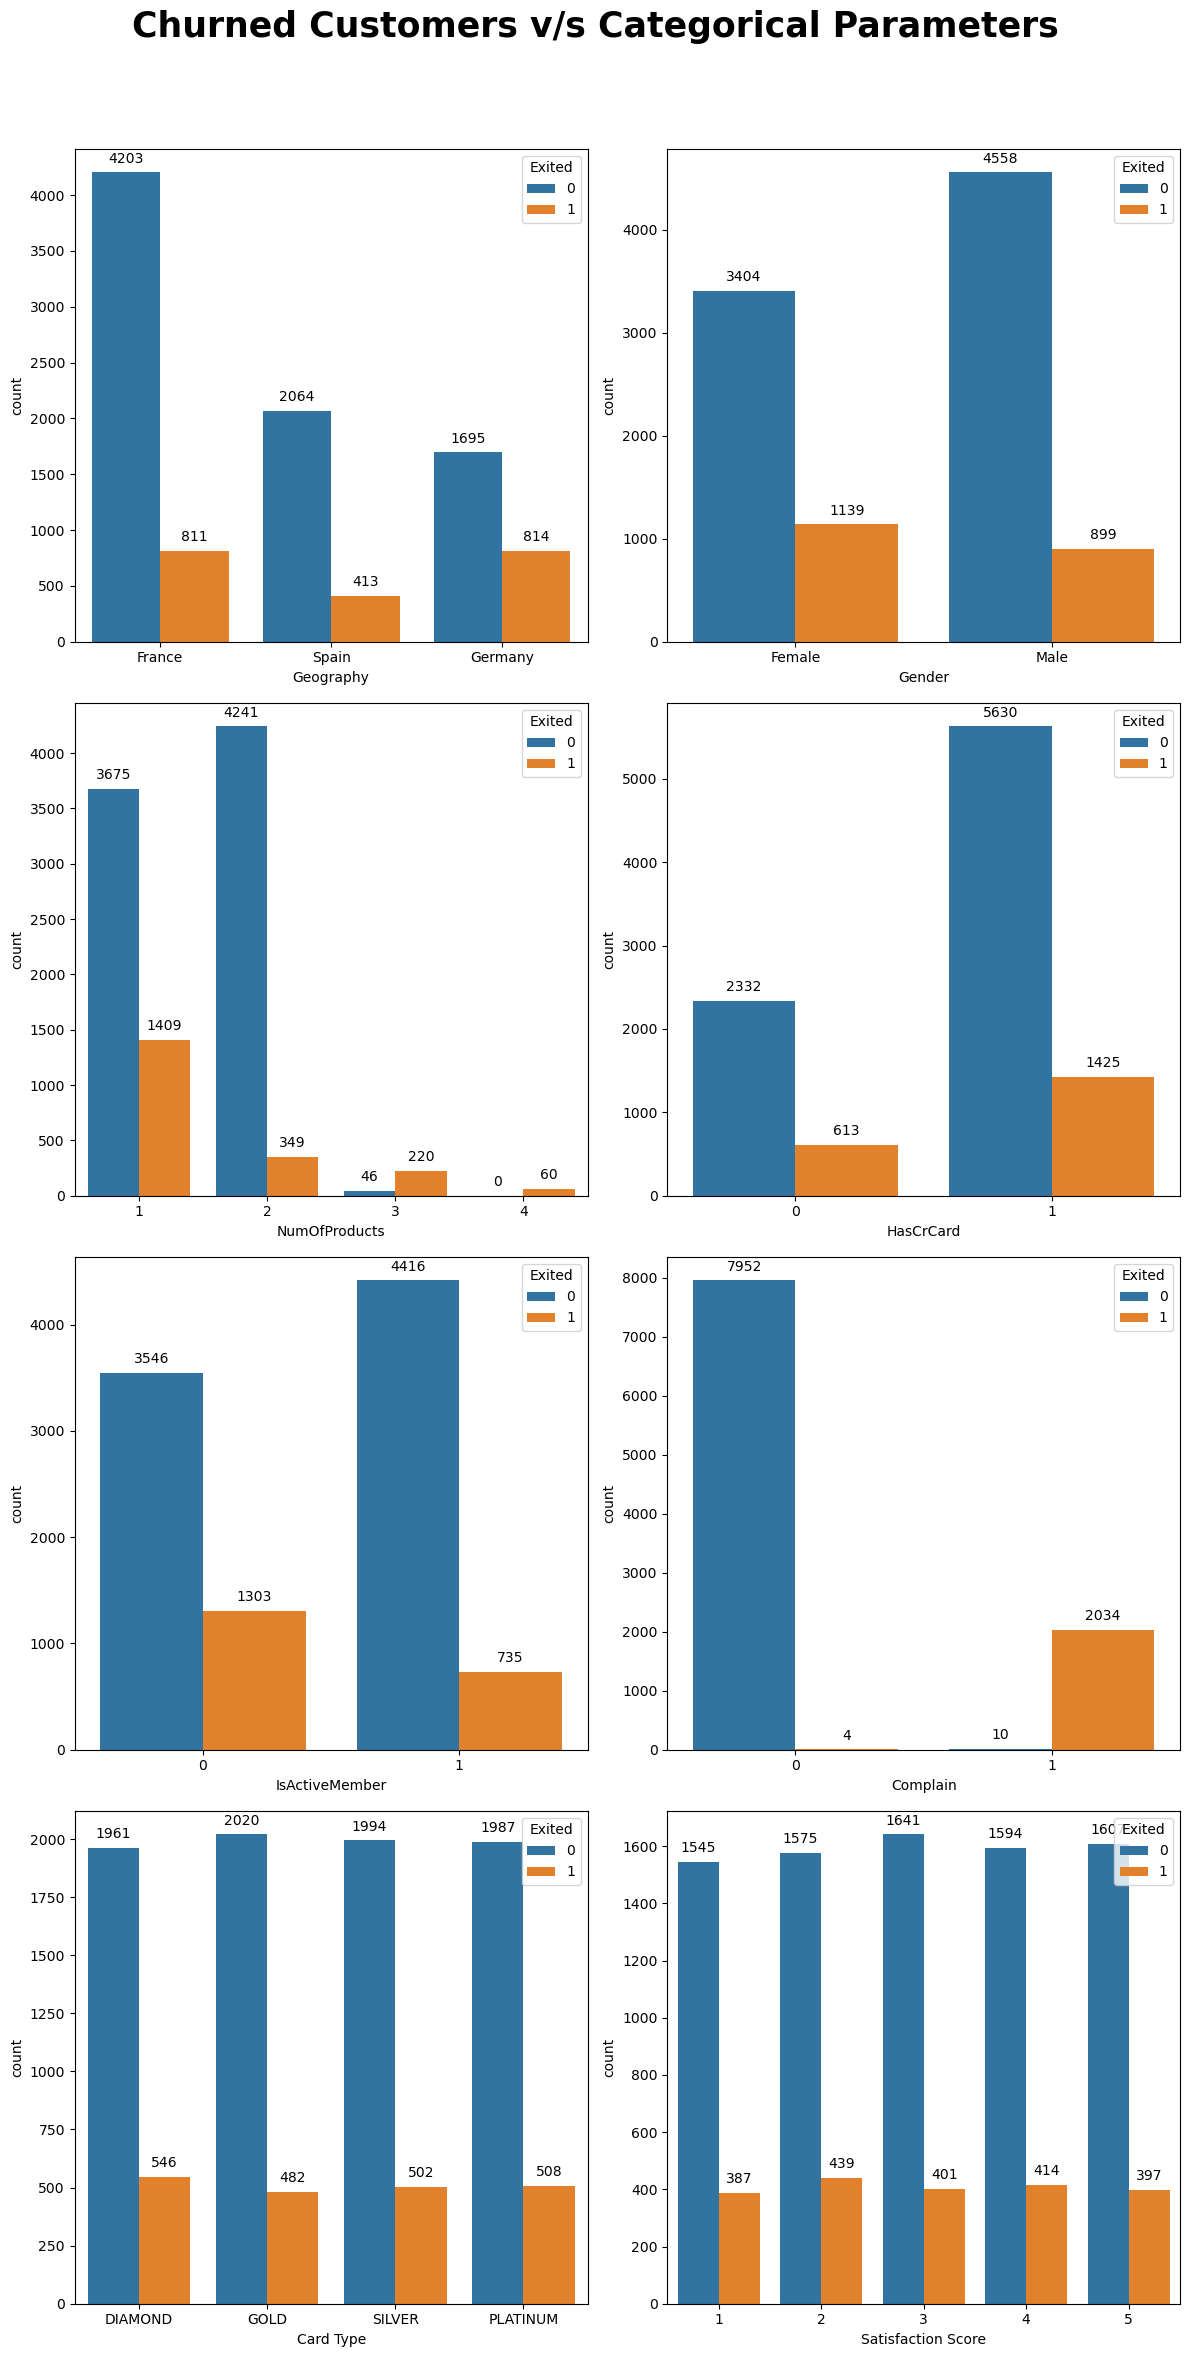

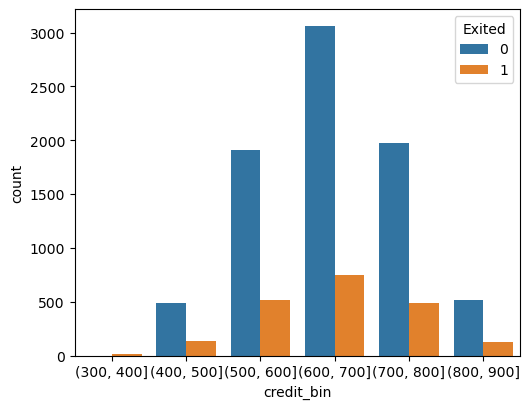

In [136]:
# Comparing categorical variables against their counts for churned customers


fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(12, 24))

index = 0
for row in range(4):
    for col in range(2):
        ax = sns.countplot(x = data[cat_col[index]], ax = axis[row,col], hue = data['Exited'])
        index += 1
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')

plt.subplots_adjust(hspace=0.3, wspace = 0.5)

# Adding main plot heading
fig.suptitle('Churned Customers v/s Categorical Parameters', fontsize=25, fontweight='bold')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.figure(figsize = (5.75, 4.5))
sns.countplot(x = data['credit_bin'], hue = data.Exited)

<Axes: xlabel='EstimatedSalary', ylabel='Balance'>

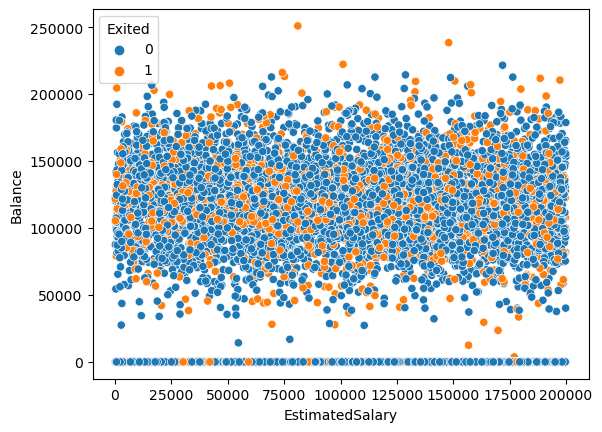

In [137]:
sns.scatterplot(x = data['EstimatedSalary'], y = data['Balance'], hue = data['Exited'])

/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_360/2604537913.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


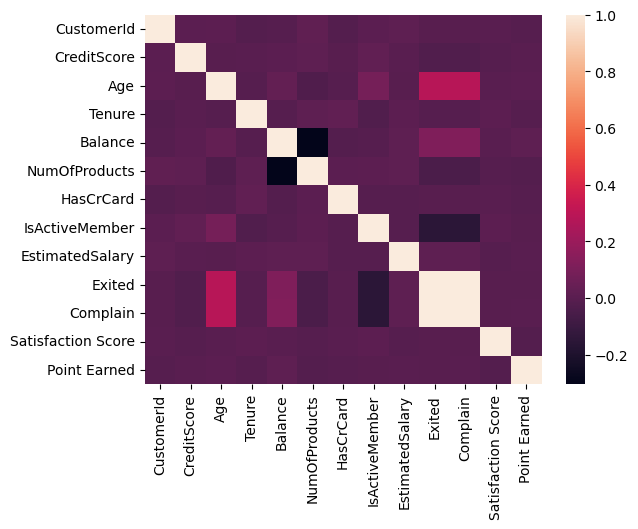

In [138]:
# Heatmap to visuaize the correlation between all the parameters/factors

sns.heatmap(data.corr())
plt.show()

# Hypothesis Testing

# Credit Score v/s Customer Churn

In [139]:
# Let's see the distribution of customers by credit score for all cutomers and churned customers

print(f'Customer distributyion by CreditScore : \n{data.credit_bin.value_counts(normalize = True)} \n \n{data.credit_bin.value_counts()}')
print('\n'+20*'___'+'\n')
print(f'Churned Customer distributyion by CreditScore : \n{churn.credit_bin.value_counts(normalize = True)} \n \n{churn.credit_bin.value_counts()}')

Customer distributyion by CreditScore : 
(600, 700]    0.3818
(700, 800]    0.2471
(500, 600]    0.2423
(800, 900]    0.0645
(400, 500]    0.0624
(300, 400]    0.0019
Name: credit_bin, dtype: float64 
 
(600, 700]    3818
(700, 800]    2471
(500, 600]    2423
(800, 900]     645
(400, 500]     624
(300, 400]      19
Name: credit_bin, dtype: int64

____________________________________________________________



AttributeError: 'DataFrame' object has no attribute 'credit_bin'

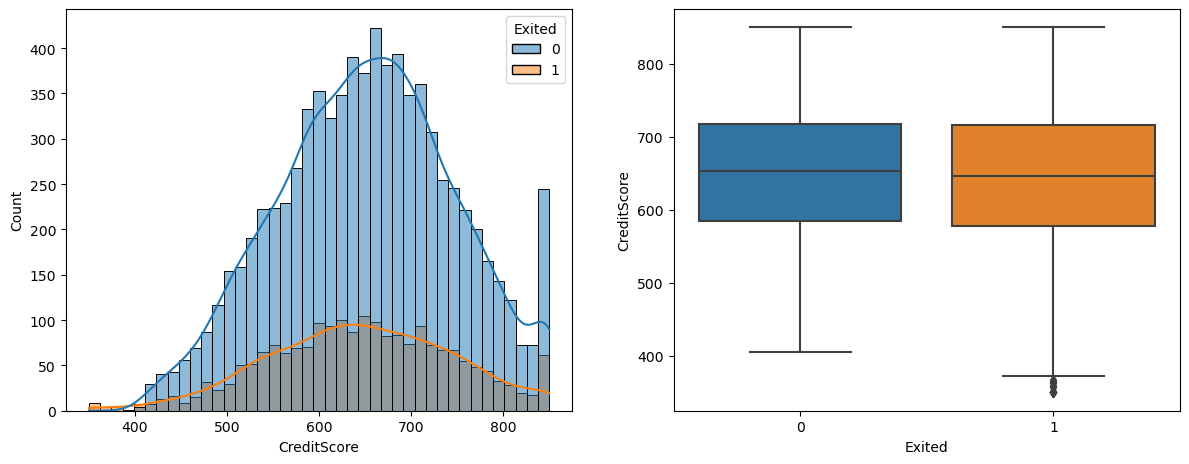

<Axes: xlabel='credit_bin', ylabel='count'>

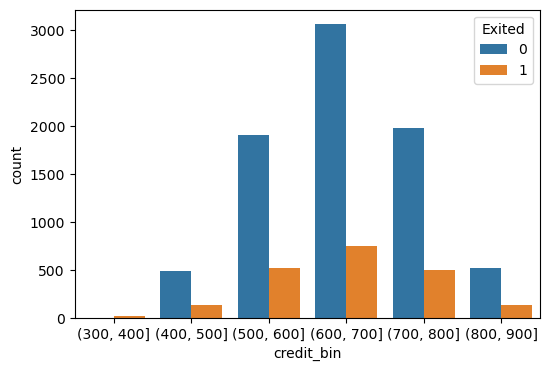

In [140]:
fig, ax = plt.subplots(1,2,figsize = (12,5))
sns.histplot(x = data['CreditScore'], kde = True, hue = data.Exited, ax = ax[0])
sns.boxplot(x = data['Exited'], y = data.CreditScore, ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.2)
plt.show()

plt.figure(figsize = (6, 4))
sns.countplot(x = data.credit_bin, hue = data.Exited)

Hypothesis testing for Credit Score v/s Customer Churn

Test - 2 Sample T Test
Significance - 5%

We will be using 2 sample T test as we are testing for significance effect of numerical variable(credit score) on categorical variable(customer churn) at 5% significance value

In [141]:
# H0 = Customer churn is independant of Credit Score
# H0 = Customer churn is dependant on Credit Score


t_stat, p_val = ttest_ind(data[data.Exited == 0]['CreditScore'], data[data.Exited == 1]['CreditScore'])
print(f't_test: \n{t_stat}'+'\n')

print(f'P_value: \n{p_val}'+'\n')

if p_val < 0.05:
    print('Reject the H0 Hypothesis'+'\n'+'Customer churn is dependant on Credit Score')
else:
    print ('Fail to Reject the H0 Hypothesis'+'\n'+'Customer churn is independant of Credit Score')

t_test: 
2.6778368664704235

P_value: 
0.0074220372427342435

Reject the H0 Hypothesis
Customer churn is dependant on Credit Score


- From the box plot, there is very slight difference in the median credit score of all the customers.
- Based on Hypothesis testing Customer churn is significantly dependant on the credit score of the customer

# Age v/s Customer Churn

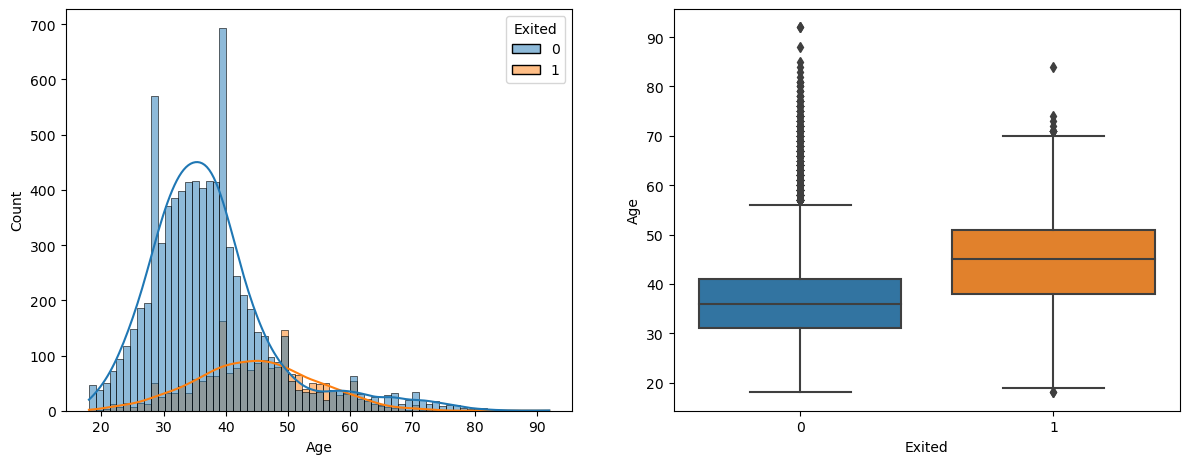

In [142]:
fig, ax = plt.subplots(1,2,figsize = (12,5))
sns.histplot(x= data.Age, hue = data.Exited, kde = True, ax = ax[0])
sns.boxplot(x = data['Exited'], y = data.Age, ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.2)
plt.show()

Hypothesis testing for Age v/s Customer Churn

- Test = 2 sample T test
- Siginficance = 5%

We will be using 2 sample T test as we are testing for significance effect of numerical variable(Age) on categorical variable(customer churn) at 5% significance value

In [143]:
# H0 = Customer churn is independant of Age
# H0 = Customer churn is dependant on Age


t_stat, p_val = ttest_ind(data[data.Exited == 0]['Age'], data[data.Exited == 1]['Age'])
print(f't_test: \n{t_stat}'+'\n')

print(f'P_value: \n{p_val}'+'\n')

if p_val < 0.05:
    print('Reject the H0 Hypothesis'+'\n'+'Customer churn is dependant on Age')
else:
    print ('Fail to Reject the H0 Hypothesis'+'\n'+'Customer churn is independant of Age')

t_test: 
-29.76379695489027

P_value: 
1.3467162476197306e-186

Reject the H0 Hypothesis
Customer churn is dependant on Age


- The median age of customers who churned (45) is higher than the others (35).
- Age is significantly impacting the customer churn here.

#  Tenure v/s Customer Churn

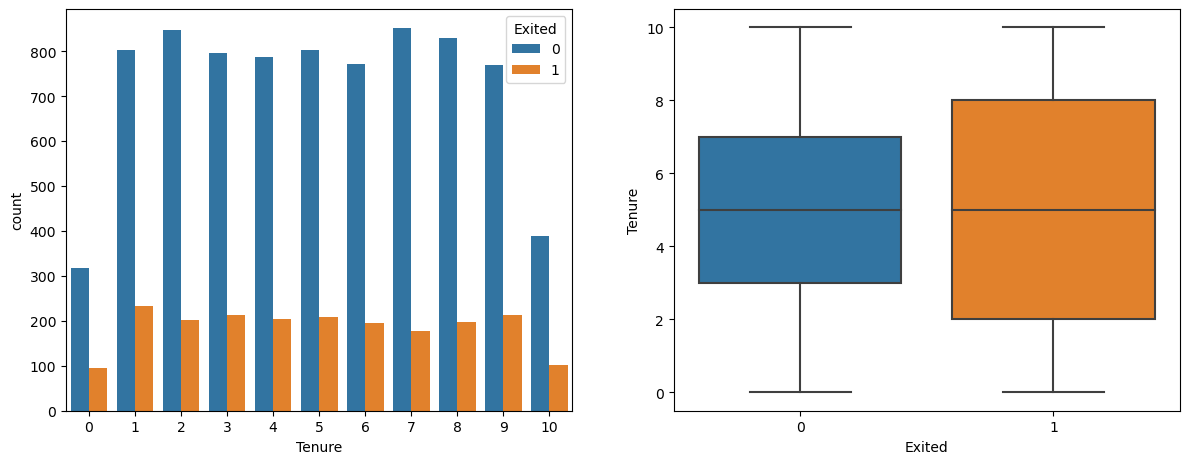

In [144]:
fig, ax = plt.subplots(1,2,figsize = (12,5))
sns.countplot(x= data.Tenure, hue = data.Exited, ax = ax[0])
sns.boxplot(x = data['Exited'], y = data.Tenure, ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.2)
plt.show()

Hypothesis testing for Tenure v/s Customer Churn


- Test = 2 sample T test
- Siginficance = 5%

We will be using 2 sample T test as we are testing for significance effect of numerical variable(Tenure) on categorical variable(customer churn) at 5% significance value

In [145]:
# H0 = Customer churn is independant of Tenure
# H0 = Customer churn is dependant on Tenure


t_stat, p_val = ttest_ind(data[data.Exited == 0]['Tenure'],
                          data[data.Exited == 1]['Tenure'])

print(f't_test: \n{t_stat}'+'\n')

print(f'P_value: \n{p_val}'+'\n')

if p_val < 0.05:
    print('Reject the H0 Hypothesis'+'\n'+'Customer churn is dependant on Tenure')
else:
    print ('Fail to Reject the H0 Hypothesis'+'\n'+'Customer churn is independant of Tenure')

t_test: 
1.365570678788837

P_value: 
0.1721044754880606

Fail to Reject the H0 Hypothesis
Customer churn is independant of Tenure


-  The median Tenure of both the customers who exited and who did not is 4.5 years. Customers who exited have broader tenure range from 2 - 8
- Hypothesis test confirms the initial observation that customer churn is independent of Tenure.

#  Balance v/s Customer Churn



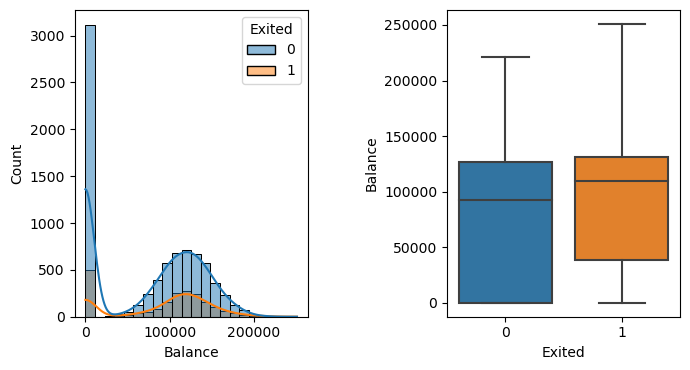

In [146]:
fig, ax = plt.subplots(1,2,figsize = (7,4))
sns.histplot(x= data.Balance, hue = data.Exited, kde = True, ax = ax[0])
sns.boxplot(x = data['Exited'], y = data.Balance, ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.6)
plt.show()

Hypothesis testing for Balance v/s Customer Churn

- Test = 2 sample T test
- Siginficance = 5%

We will be using 2 sample T test as we are testing for significance effect of numerical variable(Balance) on categorical variable(customer churn) at 5% significance value

In [214]:
# H0 = Customer churn is independent of Balance
# H0 = Customer churn is dependent on Balance


t_stat, p_val = ttest_ind(data[data.Exited == 0]['Balance'],
                          data[data.Exited == 1]['Balance'])
print(f't_test: \n{t_stat}'+'\n')

print(f'P_value: \n{p_val}'+'\n')

if p_val < 0.05:
    print('Reject the H0 Hypothesis'+'\n'+'Customer churn is dependent on Balance')
else:
    print ('Fail to Reject the H0 Hypothesis'+'\n'+'Customer churn is independent of Balance')

t_test: 
-11.940747722508185

P_value: 
1.2092076077156017e-32

Reject the H0 Hypothesis
Customer churn is dependent on Balance


- Bank balance of customers who exited the bank have higher median balance compared to who did not exit.
- There are also customers who had 0 balance.
- Customer churn is significantly dependent on balance.

#  Estimated Salary v/s Customer Churn

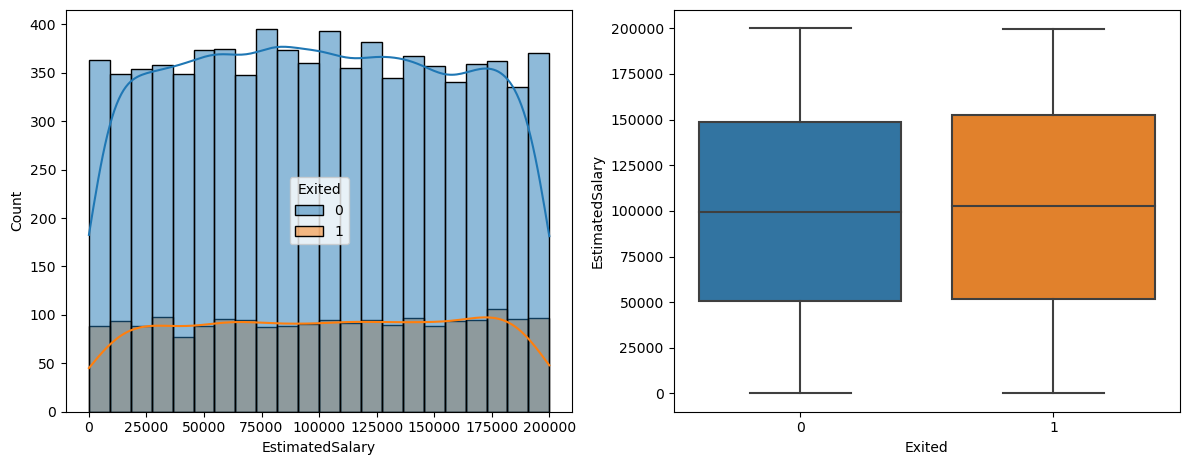

In [148]:
fig, ax = plt.subplots(1,2,figsize = (12,5))
sns.histplot(x= data.EstimatedSalary, hue = data.Exited, kde = True, ax = ax[0])
sns.boxplot(x = data['Exited'], y = data.EstimatedSalary, ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.2)
plt.show()

Hypothesis testing for Estimated Salary v/s Customer Churn

- Test = 2 sample T test
- Siginficance = 5%

We will be using 2 sample T test as we are testing for significance effect of numerical variable(Estimated Salary) on categorical variable(customer churn) at 5% significance value

In [149]:
# H0 = Customer churn is independent of Estimated Salary
# H0 = Customer churn is dependent on Estimated Salary


t_stat, p_val = ttest_ind(data[data.Exited == 0]['EstimatedSalary'], data[data.Exited == 1]['EstimatedSalary'])
print(f't_test: \n{t_stat}'+'\n')

print(f'P_value: \n{p_val}'+'\n')

if p_val < 0.05:
    print('Reject the H0 Hypothesis'+'\n'+'Customer churn is dependent on Estimated Salary')
else:
    print ('Fail to Reject the H0 Hypothesis'+'\n'+'Customer churn is independent of Estimated Salary')

t_test: 
-1.2489445044833742

P_value: 
0.2117146135149097

Fail to Reject the H0 Hypothesis
Customer churn is independent of Estimated Salary


-  Estimated Salary has no significant impact on customer churn

# Geography v/s Customer Churn

<Axes: xlabel='Geography', ylabel='count'>

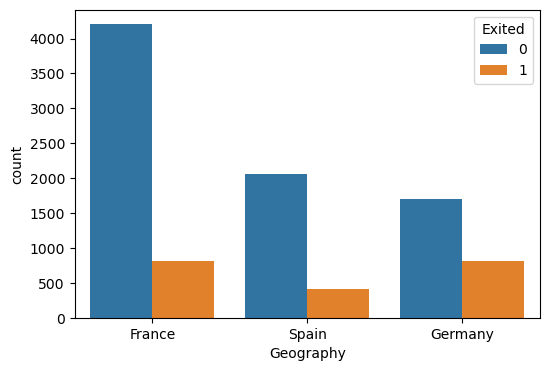

In [150]:
plt.figure(figsize = (6,4))
sns.countplot(x = data.Geography, hue = data.Exited)

In [151]:
geo = pd.crosstab(columns = data.Geography, index = data.Exited)
geo

Geography,France,Germany,Spain
Exited,,,
0,4203,1695,2064
1,811,814,413


* Hypothesis Test

- Test = Chisquared Test for Independance
- Significance = 5%

We will be conducting Chisquared Test for Independance to confirm if 2 categorical variable(Geography & Customer churn) are related or not at 5% significance value

In [152]:
# H0 = Customer churn and Geography are independent
# H0 = Customer churn and Geography are dependent


t_stat, p_val, DOF, array = chi2_contingency(geo)
print(f't_stat: \n{t_stat}'+'\n')

print(f'P_value: \n{p_val}'+'\n')

print(f'DOF: \n{DOF}'+'\n')

print(f'Expected Array: \n{array}'+'\n')

if p_val < 0.05:
    print('Reject the H0 Hypothesis'+'\n'+'Customer churn and Geography are dependent')
else:
    print ('Fail to Reject the H0 Hypothesis'+'\n'+'Customer churn and Geography are independent')

t_stat: 
300.6264011211942

P_value: 
5.245736109572763e-66

DOF: 
2

Expected Array: 
[[3992.1468 1997.6658 1972.1874]
 [1021.8532  511.3342  504.8126]]

Reject the H0 Hypothesis
Customer churn and Geography are dependent


- Germany has 34% customer churn rate while France and Spain has 16% and 16.6% respectively
- Customer churn and Geography are significantly dependent

# Gender v/s Customer Churn

<Axes: xlabel='Gender', ylabel='count'>

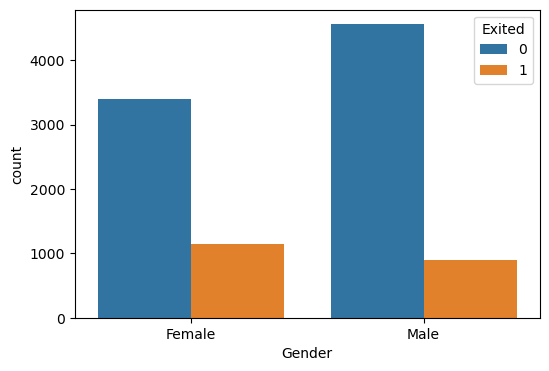

In [153]:
plt.figure(figsize = (6,4))
sns.countplot(x = data.Gender, hue = data.Exited)

In [154]:
gender = pd.crosstab(columns = data.Gender, index = data.Exited)
gender

Gender,Female,Male
Exited,,
0,3404,4558
1,1139,899


* Hypothesis Test

- Test = Chisquared Test for Independance
- Significance = 5%

We will be conducting Chisquared Test for Independance to confirm if 2 categorical variable(Gender & Customer churn) are related or not at 5% significance value

In [155]:
# H0 = Customer churn and Gender are independent
# H0 = Customer churn and Gender are dependent


t_stat, p_val, DOF, array = chi2_contingency(gender)
print(f't_stat: \n{t_stat}'+'\n')

print(f'P_value: \n{p_val}'+'\n')

print(f'DOF: \n{DOF}'+'\n')

print(f'Expected Array: \n{array}'+'\n')

if p_val < 0.05:
    print('Reject the H0 Hypothesis'+'\n'+'Customer churn and Gender are dependent')
else:
    print ('Fail to Reject the H0 Hypothesis'+'\n'+'Customer churn and Gender are independent')

t_stat: 
112.39655374778587

P_value: 
2.9253677618642e-26

DOF: 
1

Expected Array: 
[[3617.1366 4344.8634]
 [ 925.8634 1112.1366]]

Reject the H0 Hypothesis
Customer churn and Gender are dependent


- 54.5% of customers are Male. The churn rate is higher in female customers compared to male. With 25% of total female and 16.5% of total male customers.
- Customer gender is significantly impacting the customer churn.

# Having Credit Card v/s Customer Churn

<Axes: xlabel='HasCrCard', ylabel='count'>

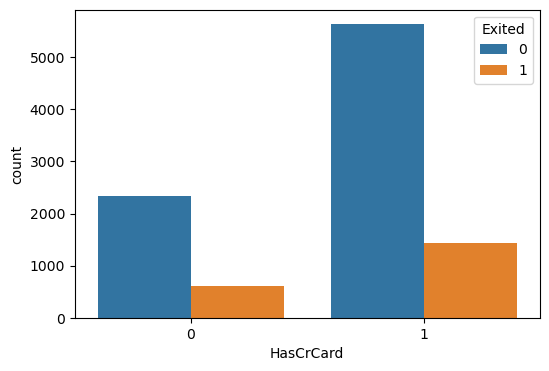

In [156]:
plt.figure(figsize = (6,4))
sns.countplot(x = data.HasCrCard, hue = data.Exited)

In [157]:
hscrd = pd.crosstab(columns = data.HasCrCard, index = data.Exited)
hscrd

HasCrCard,0,1
Exited,,
0,2332,5630
1,613,1425


* Hypothesis Test

- Test = Chisquared Test for Independance
- Significance = 5%

We will be conducting Chisquared Test for Independance to confirm if 2 categorical variable(Having credit card & Customer churn) are related or not at 5% significance value

In [158]:
# H0 = Customer churn and Credit Card are independent
# H0 = Customer churn and Credit Card are dependent


t_stat, p_val, DOF, array = chi2_contingency(hscrd)
print(f't_stat: \n{t_stat}'+'\n')

print(f'P_value: \n{p_val}'+'\n')

print(f'DOF: \n{DOF}'+'\n')

print(f'Expected Array: \n{array}'+'\n')

if p_val < 0.05:
    print('Reject the H0 Hypothesis'+'\n'+'Customer churn and Credit Card are dependent')
else:
    print ('Fail to Reject the H0 Hypothesis'+'\n'+'Customer churn and Credit Card are independent')

t_stat: 
0.4494039375253385

P_value: 
0.5026181509009862

DOF: 
1

Expected Array: 
[[2344.809 5617.191]
 [ 600.191 1437.809]]

Fail to Reject the H0 Hypothesis
Customer churn and Credit Card are independent


<Axes: xlabel='NumOfProducts', ylabel='count'>

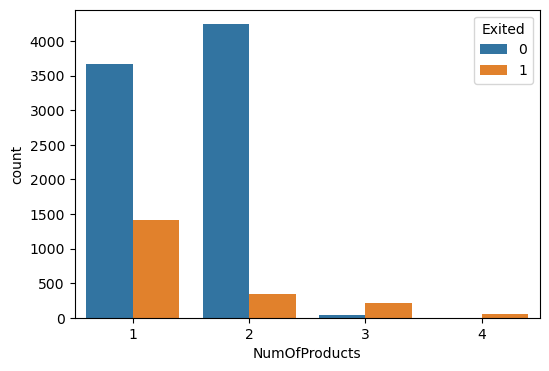

In [209]:
plt.figure(figsize = (6,4))
sns.countplot(x = data.NumOfProducts, hue = data.Exited)

In [210]:
pdct = pd.crosstab(columns = data.NumOfProducts, index = data.Exited)
pdct

NumOfProducts,1,2,3,4
Exited,,,,
0,3675,4241,46,0
1,1409,349,220,60


* Hypothesis Test

- Test = Chisquared Test for Independance
- Significance = 5%

We will be conducting Chisquared Test for Independance to confirm if 2 categorical variable(Number of Products & Customer churn) are related or not at 5% significance value

In [211]:
# H0 = Customer churn and Number of Products are independent
# H0 = Customer churn and Number of Product are dependent


t_stat, p_val, DOF, array = chi2_contingency(pdct)
print(f't_stat: \n{t_stat}'+'\n')

print(f'P_value: \n{p_val}'+'\n')

print(f'DOF: \n{DOF}'+'\n')

print(f'Expected Array: \n{array}'+'\n')

if p_val < 0.05:
    print('Reject the H0 Hypothesis'+'\n'+'Customer churn and Number of Product are dependent')
else:
    print ('Fail to Reject the H0 Hypothesis'+'\n'+'Customer churn and Number of Product are independent')

t_stat: 
1501.5048306588592

P_value: 
0.0

DOF: 
3

Expected Array: 
[[4047.8808 3654.558   211.7892   47.772 ]
 [1036.1192  935.442    54.2108   12.228 ]]

Reject the H0 Hypothesis
Customer churn and Number of Product are dependent


- Number of products has significant impact on customer churn

# Credit card Type v/s Customer Churn

<Axes: xlabel='Card Type', ylabel='count'>

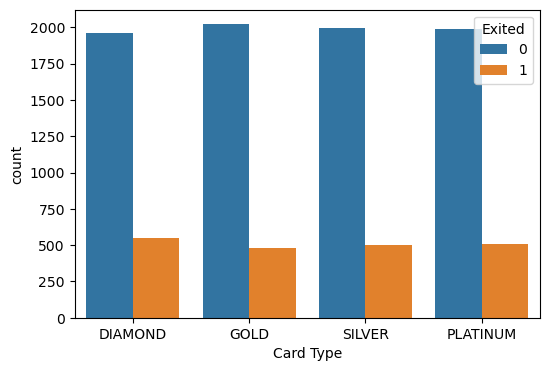

In [159]:
plt.figure(figsize = (6,4))
sns.countplot(x = data['Card Type'], hue = data.Exited)

In [160]:
crd = pd.crosstab(columns = data['Card Type'], index = data.Exited)
crd


Card Type,DIAMOND,GOLD,PLATINUM,SILVER
Exited,,,,
0,1961,2020,1987,1994
1,546,482,508,502


* Hypothesis Test

- Test = Chisquared Test for Independance
- Significance = 5%

We will be conducting Chisquared Test for Independance to confirm if 2 categorical variable(Type of Credit card & Customer churn) are related or not at 5% significance value

In [161]:
# H0 = Customer churn and Type of Credit card are independent
# H0 = Customer churn and Type of credit card are dependent


t_stat, p_val, DOF, array = chi2_contingency(crd)
print(f't_stat: \n{t_stat}'+'\n')

print(f'P_value: \n{p_val}'+'\n')


print(f'DOF: \n{DOF}'+'\n')

print(f'Expected Array: \n{array}'+'\n')

if p_val < 0.05:
    print('Reject the H0 Hypothesis'+'\n'+'Customer churn and Type of Credit card are dependent')
else:
    print ('Fail to Reject the H0 Hypothesis'+'\n'+'Customer churn and Type of Credit card are independent')

t_stat: 
5.053223027060927

P_value: 
0.16794112067810177

DOF: 
3

Expected Array: 
[[1996.0734 1992.0924 1986.519  1987.3152]
 [ 510.9266  509.9076  508.481   508.6848]]

Fail to Reject the H0 Hypothesis
Customer churn and Type of Credit card are independent


Having credit card or the type of credit card has no impact on customer churn

# Active Member v/s Customer Churn


<Axes: xlabel='IsActiveMember', ylabel='count'>

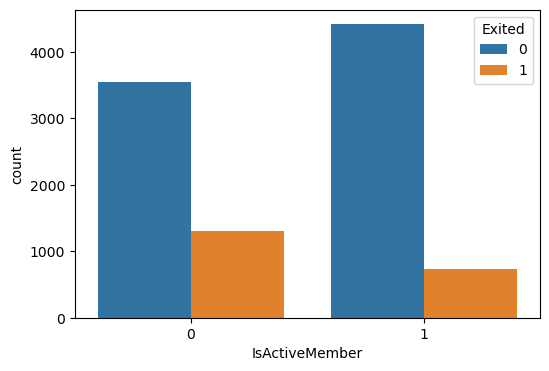

In [162]:
plt.figure(figsize = (6,4))
sns.countplot(x = data.IsActiveMember, hue = data.Exited)

In [163]:
act = pd.crosstab(columns = data.IsActiveMember, index = data.Exited)
act

IsActiveMember,0,1
Exited,,
0,3546,4416
1,1303,735


* Hypothesis Test

- Test = Chisquared Test for Independance
- Significance = 5%

We will be conducting Chisquared Test for Independance to confirm if 2 categorical variable(Active Member & Customer churn) are related or not at 5% significance value

In [164]:
# H0 = Customer churn and Active Membership are independent
# H0 = Customer churn and Active Membership are dependent


t_stat, p_val, DOF, array = chi2_contingency(act)
print(f't_stat: \n{t_stat}'+'\n')

print(f'P_value: \n{p_val}'+'\n')

print(f'DOF: \n{DOF}'+'\n')

print(f'Expected Array: \n{array}'+'\n')

if p_val < 0.05:
    print('Reject the H0 Hypothesis'+'\n'+'Customer churn and Active Membership are dependent')
else:
    print ('Fail to Reject the H0 Hypothesis'+'\n'+'Customer churn and Active Membership are independent')

t_stat: 
243.6948024819593

P_value: 
6.153167438113408e-55

DOF: 
1

Expected Array: 
[[3860.7738 4101.2262]
 [ 988.2262 1049.7738]]

Reject the H0 Hypothesis
Customer churn and Active Membership are dependent


- Out of the total number of customers who exited the bank majority of them were not active
- Based on the heat map as well, we observed that IsActivemember is slightly negatively correlated with customer churn.
- Customer who are not Active are more likely to churn
- Customer churn and not Active Membership are dependent

# Satisfaction Score v/s Customer Churn

<Axes: xlabel='Satisfaction Score', ylabel='count'>

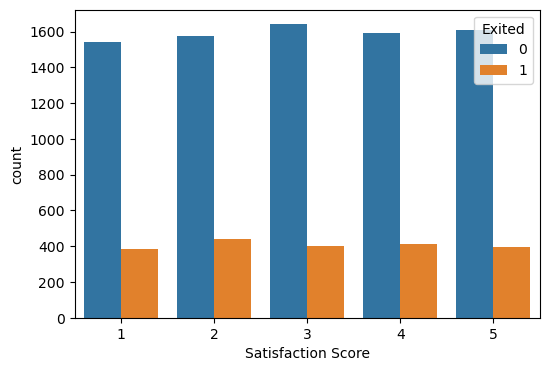

In [165]:
plt.figure(figsize = (6,4))
sns.countplot(x = data['Satisfaction Score'], hue = data.Exited)

In [166]:
sat = pd.crosstab(columns = data['Satisfaction Score'], index = data.Exited)
sat

Satisfaction Score,1,2,3,4,5
Exited,,,,,
0,1545,1575,1641,1594,1607
1,387,439,401,414,397


Hypothesis Test

- Test = Chisquared Test for Independance
- Significance = 5%

We will be conducting Chisquared Test for Independance to confirm if 2 categorical variable(Satisfaction Score & Customer churn) are related or not at 5% significance value

In [167]:
# H0 = Customer churn and Satisfaction Score are independent
# H0 = Customer churn and Satisfaction Score are dependent


t_stat, p_val, DOF, array = chi2_contingency(sat)
print(f't_stat: \n{t_stat}'+'\n')

print(f'P_value: \n{p_val}'+'\n')

print(f'DOF: \n{DOF}'+'\n')

print(f'Expected Array: \n{array}'+'\n')

if p_val < 0.05:
    print('Reject the H0 Hypothesis'+'\n'+'Customer churn and Satisfaction Score are dependent')
else:
    print ('Fail to Reject the H0 Hypothesis'+'\n'+'Customer Churn and Satisfaction Score are independent')

t_stat: 
3.8027035326309573

P_value: 
0.4333649732774312

DOF: 
4

Expected Array: 
[[1538.2584 1603.5468 1625.8404 1598.7696 1595.5848]
 [ 393.7416  410.4532  416.1596  409.2304  408.4152]]

Fail to Reject the H0 Hypothesis
Customer Churn and Satisfaction Score are independent


- Customer Churn and Satisfaction Score are independent

# Complaint v/s Customer Churn

<Axes: xlabel='Complain', ylabel='count'>

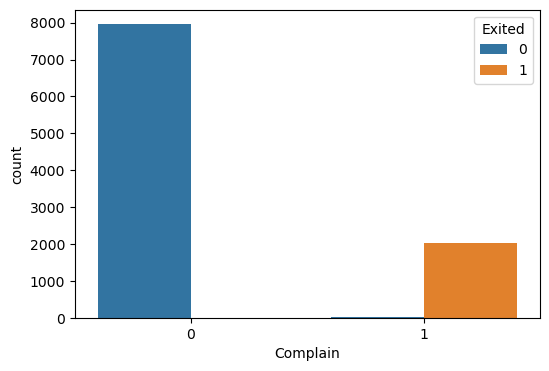

In [168]:
plt.figure(figsize = (6,4))
sns.countplot(x = data.Complain, hue = data.Exited)

In [169]:
comp = pd.crosstab(columns = data.Complain, index = data.Exited)
comp

Complain,0,1
Exited,,
0,7952,10
1,4,2034


Hypothesis Test

- Test = Chisquared Test for Independance
- Significance = 5%

We will be conducting Chisquared Test for Independance to confirm if 2 categorical variable(Complain & Customer churn) are related or not at 5% significance value

In [170]:
# H0 = Customer churn and Customer Complain are independant
# H0 = Customer churn and Customer Complain are dependant


t_stat, p_val, DOF, array = chi2_contingency(comp)
print(f't_stat: \n{t_stat}'+'\n')

print(f'P_value: \n{p_val}'+'\n')

print(f'DOF: \n{DOF}'+'\n')

print(f'Expected Array: \n{array}'+'\n')

if p_val < 0.05:
    print('Reject the H0 Hypothesis'+'\n'+'Customer churn and Customer Complain are dependant')
else:
    print ('Fail to Reject the H0 Hypothesis'+'\n'+'Customer Churn and Customer Complain are independant')

t_stat: 
9907.907035880155

P_value: 
0.0

DOF: 
1

Expected Array: 
[[6334.5672 1627.4328]
 [1621.4328  416.5672]]

Reject the H0 Hypothesis
Customer churn and Customer Complain are dependant


- 99% of customers who exited had complain in the past
- Based on the above result we can see that customer churn is dependent on customer complain but not on customer satisfaction.
- Let's deep dive further and test variable impacting customer complain

# Complaint v/s Customer Satisfaction

<Axes: xlabel='Satisfaction Score', ylabel='count'>

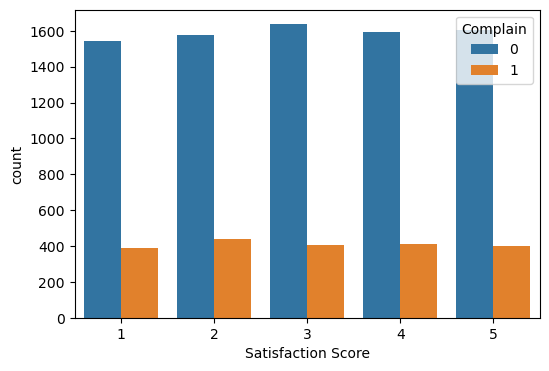

In [172]:
plt.figure(figsize = (6,4))

sns.countplot(hue = data['Complain'], x = data['Satisfaction Score'])

In [173]:
churnsatscore = pd.crosstab(columns = data['Satisfaction Score'], index = data.Complain)
churnsatscore

Satisfaction Score,1,2,3,4,5
Complain,,,,,
0,1545,1576,1636,1595,1604
1,387,438,406,413,400


* Hypothesis Test

We will be conducting Chisquared Test for Independance to confirm if 2 categorical variable(Complain & Customer churn) are related or not at 5% significance value

In [174]:
# H0 = Customer churn and Customer Complain are independant
# H0 = Customer churn and Customer Complain are dependant


t_stat, p_val, DOF, array = chi2_contingency(churnsatscore)
print(f't_stat: \n{t_stat}'+'\n')

print(f'P_value: \n{p_val}'+'\n')

print(f'DOF: \n{DOF}'+'\n')

print(f'Expected Array: \n{array}'+'\n')

if p_val < 0.05:
    print('Reject the H0 Hypothesis'+'\n'+'Customer Satisfaction Score and Customer Complain are dependant')
else:
    print ('Fail to Reject the H0 Hypothesis'+'\n'+'Customer Satisfaction Score and Customer Complain are independant')

t_stat: 
3.011063550344488

P_value: 
0.5559756516610992

DOF: 
4

Expected Array: 
[[1537.0992 1602.3384 1624.6152 1597.5648 1594.3824]
 [ 394.9008  411.6616  417.3848  410.4352  409.6176]]

Fail to Reject the H0 Hypothesis
Customer Satisfaction Score and Customer Complain are independant


# Complain v/s Age

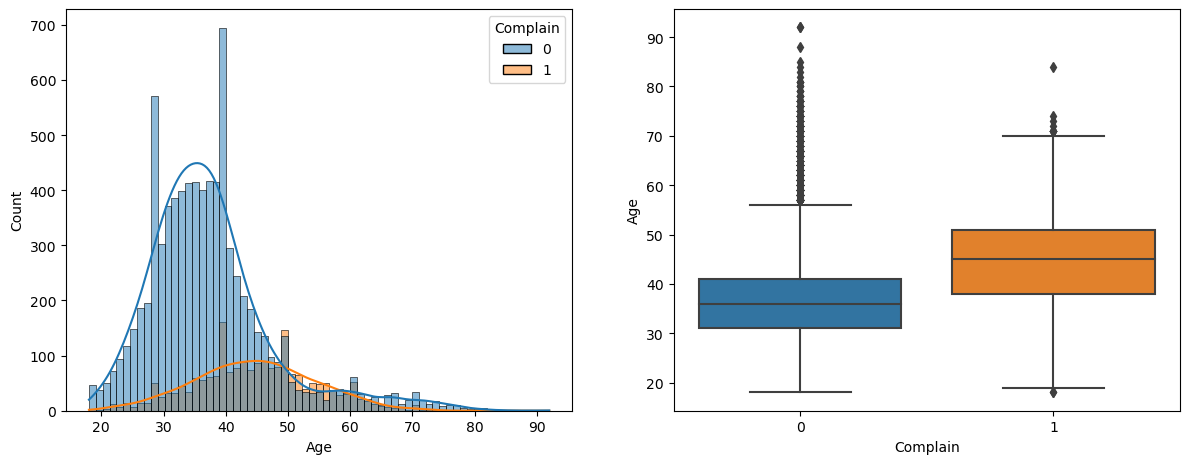

In [175]:
fig, ax = plt.subplots(1,2,figsize = (12,5))
sns.histplot(x= data.Age, hue = data.Complain, kde = True, ax = ax[0])
sns.boxplot(x = data['Complain'], y = data.Age, ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.2)
plt.show()

In [176]:
# H0 = Customer churn is independant of Age
# H0 = Customer churn is dependant on Age


t_stat, p_val = ttest_ind(data[data.Complain == 0]['Age'], data[data.Complain == 1]['Age'])
print(f't_test: \n{t_stat}'+'\n')

print(f'P_value: \n{p_val}'+'\n')

if p_val < 0.05:
    print('Reject the H0 Hypothesis'+'\n'+'Customer complain is dependant on Age')
else:
    print ('Fail to Reject the H0 Hypothesis'+'\n'+'Customer complain is independant of Age')

t_test: 
-29.563332689027597

P_value: 
3.2032241051560833e-184

Reject the H0 Hypothesis
Customer complain is dependant on Age


- The results of complain v/s age are the same as 99% of the customers who had complain are the one's who have exited the bank

#####Let's Deep dive into customers who have churned######

In [177]:
print(f'Total churned account: {churn.Balance.count()}'),
print(f'Balance < 0: {churn[churn.Balance < 0].count().Balance}'),
print(f'Balance = 0: {churn[churn.Balance == 0].count().Balance}'),
print(f'Balance > 0: {churn[churn.Balance > 0].count().Balance}')

Total churned account: 2038
Balance < 0: 0
Balance = 0: 500
Balance > 0: 1538


<Axes: xlabel='Balance', ylabel='Count'>

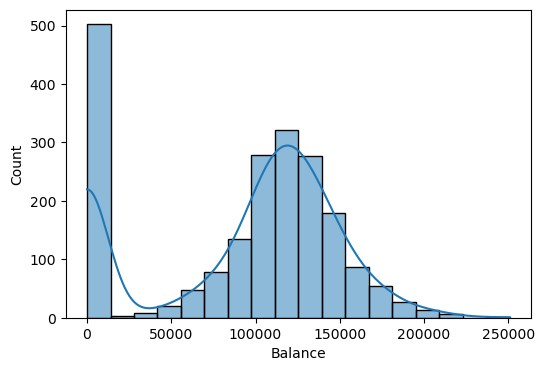

In [178]:
plt.figure(figsize = (6,4))
sns.histplot(x = churn.Balance, kde = True)

- Since there are no customers who exited the bank with less than 0 or negative balance, we don't have any defaulters

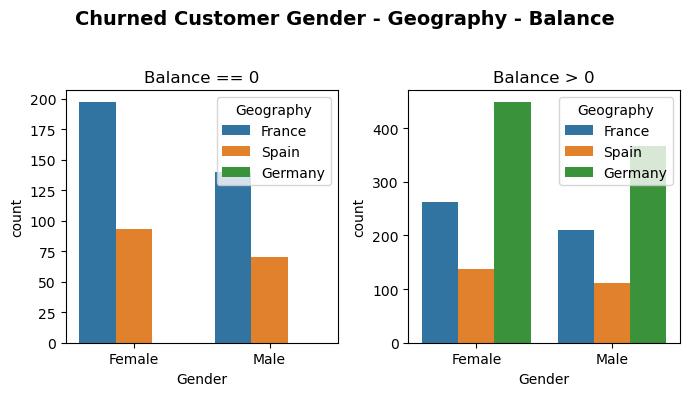

In [179]:
fig, ax = plt.subplots(1,2, figsize = (7,4))
sns.countplot(x = churn[churn.Balance == 0]['Gender'], hue = churn['Geography'], ax = ax[0])
sns.countplot(x = churn[churn.Balance > 0]['Gender'], hue = churn['Geography'], ax = ax[1])

ax[0].set_title('Balance == 0')
ax[1].set_title('Balance > 0')

plt.subplots_adjust(hspace=0.3, wspace = 0.5)

# Adding main plot heading
fig.suptitle('Churned Customer Gender - Geography - Balance', fontsize=14, fontweight='bold')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

- Germany has no customers with 0 zero balance.
- France has high number of customers who have exited with 0 balance

In [180]:
churn['Spent'] = churn.Tenure * churn.EstimatedSalary - churn.Balance
churn

/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_360/1395431340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['Spent'] = churn.Tenure * churn.EstimatedSalary - churn.Balance


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Spent
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,202697.76
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,751791.76
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484,1084297.90
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282,362340.78
16,15737452,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,0,2,SILVER,163,-127505.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1,1,3,GOLD,790,8295.81
9982,15768163,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,1,4,GOLD,591,668879.68
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,1,3,GOLD,369,189157.63
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,294599.06


In [181]:
print(f'Customers who have spoent more than their estimated income: {churn[churn.Spent < 0].CustomerId.nunique()}')

Customers who have spoent more than their estimated income: 350


- There are 350 customers who had spent more than their estimated income over the total tenure they were with the bank
- It indicates they had other sources of income
- It is a loss to the bank on customers with income from other sources and assets

In [182]:
churn_comp = data[(data.Exited == 1) & (data.Complain == 1)]

In [183]:
churn_comp['IsActiveMember'].value_counts()

0    1299
1     735
Name: IsActiveMember, dtype: int64

<Axes: xlabel='IsActiveMember', ylabel='count'>

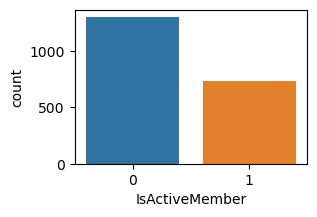

In [184]:
plt.figure(figsize = (3,2))
sns.countplot(x = churn_comp.IsActiveMember)

<Axes: xlabel='Balance', ylabel='Count'>

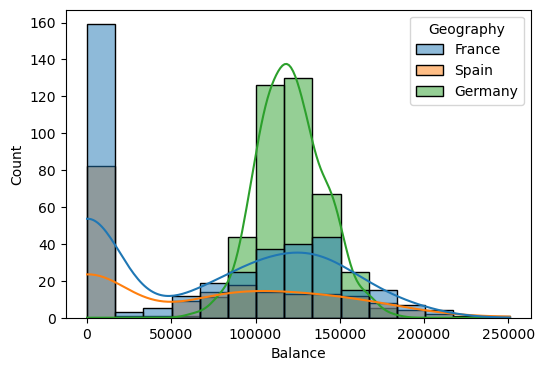

In [185]:
plt.figure(figsize = (6,4))
sns.histplot(x = churn_comp[(churn_comp.Age > 37) & (churn_comp.Age < 53)
                            & (churn_comp.CreditScore >= 500) & (churn_comp.CreditScore <=800)]['Balance'],
             kde = True, hue = churn.Geography)

# Country Specififc churned customer profiling

In [186]:
g_churn = churn_comp[churn_comp['Geography'] == 'Germany']
g_churn.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,credit_bin
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282,"(300, 400]"
46,15602280,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1,1,3,DIAMOND,779,"(800, 900]"
47,15771573,637,Germany,Female,39,9,137843.80,1,1,1,117622.80,1,1,1,SILVER,730,"(600, 700]"
53,15702298,655,Germany,Male,41,8,125561.97,1,0,0,164040.94,1,1,3,SILVER,343,"(600, 700]"
54,15569590,601,Germany,Male,42,1,98495.72,1,1,0,40014.76,1,1,2,DIAMOND,225,"(600, 700]"


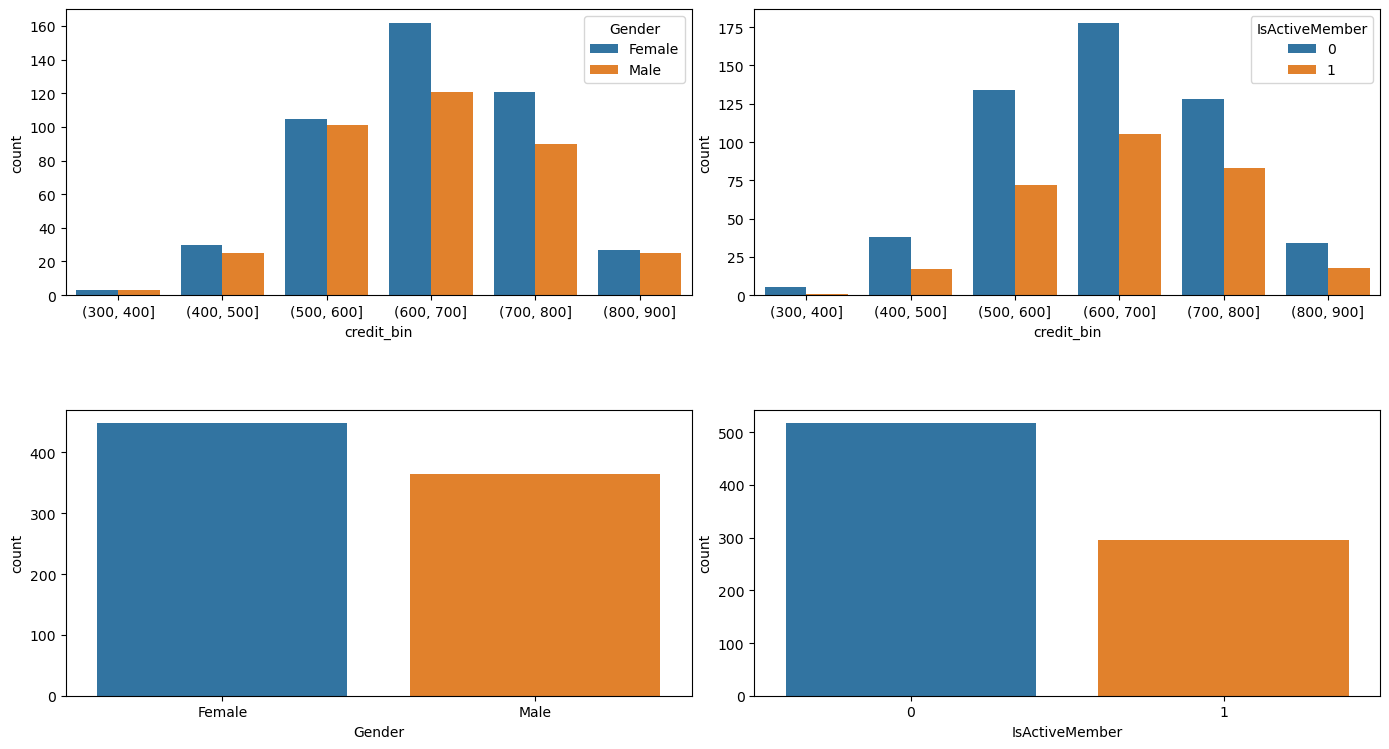

In [195]:
fig, ax = plt.subplots(2,2,figsize = (14,8))

sns.countplot(x = g_churn['credit_bin'].sort_values(ascending = True), hue = g_churn['Gender'], ax = ax[0,0])
sns.countplot(x = g_churn['credit_bin'].sort_values(ascending = True), hue = g_churn['IsActiveMember'], ax = ax[0,1])
sns.countplot(x = g_churn['Gender'], ax = ax[1,0])
sns.countplot(x = g_churn['IsActiveMember'], ax = ax[1,1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.1)
plt.show()

In [220]:
fil_g_churn = g_churn[(g_churn.CreditScore >= 500) & (g_churn.CreditScore <=800)]
fil_g_churn.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,credit_bin
47,15771573,637,Germany,Female,39,9,137843.80,1,1,1,117622.80,1,1,1,SILVER,730,"(600, 700]"
53,15702298,655,Germany,Male,41,8,125561.97,1,0,0,164040.94,1,1,3,SILVER,343,"(600, 700]"
54,15569590,601,Germany,Male,42,1,98495.72,1,1,0,40014.76,1,1,2,DIAMOND,225,"(600, 700]"
70,15703793,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1,1,4,GOLD,725,"(700, 800]"
114,15609618,721,Germany,Male,28,9,154475.54,2,0,1,101300.94,1,1,5,PLATINUM,541,"(700, 800]"


In [218]:
fil_g_churn['IsActiveMember'].value_counts()

0    181
1    105
Name: IsActiveMember, dtype: int64

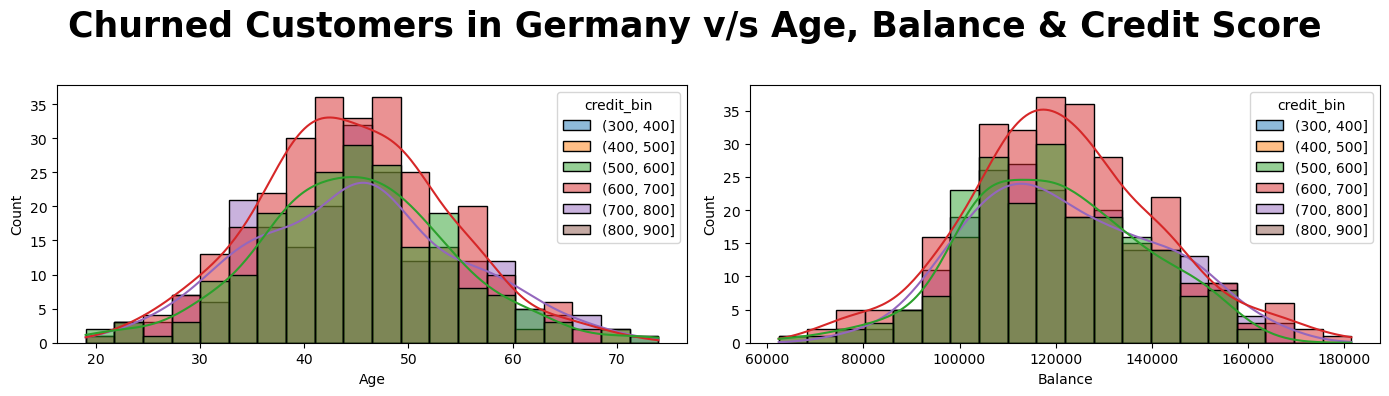

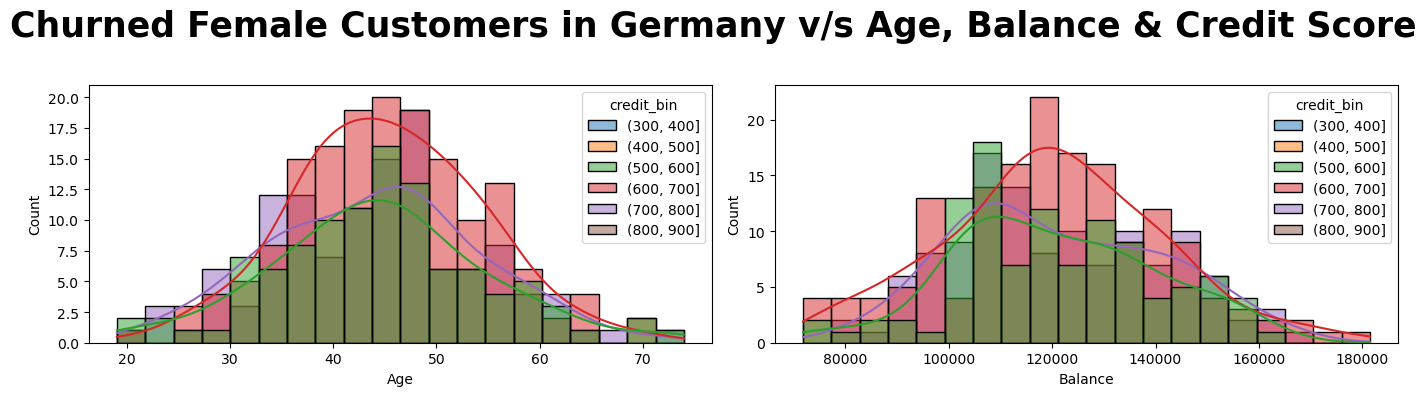

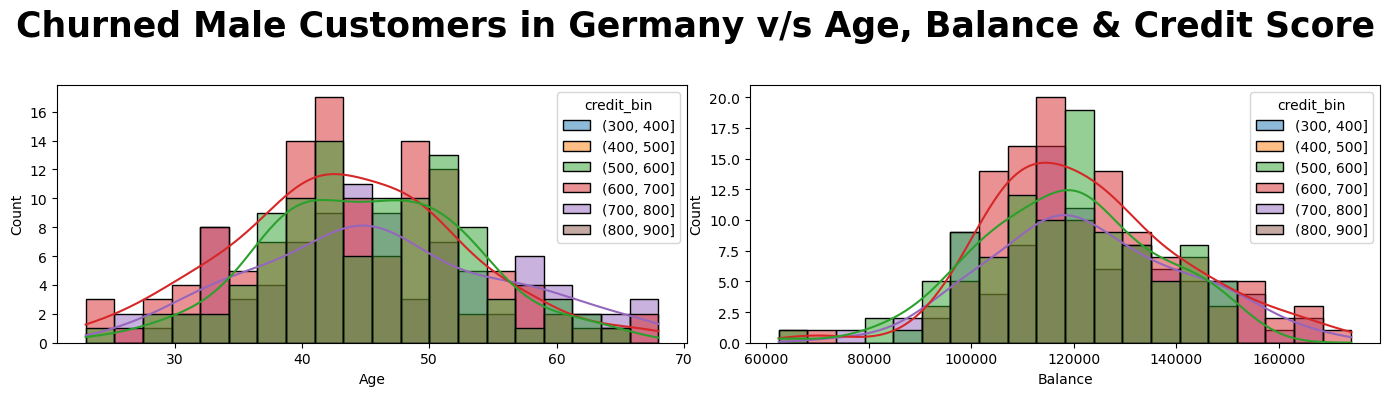

In [221]:
fig, ax = plt.subplots(1,2,figsize = (14,4))
# Adding main plot heading
fig.suptitle('Churned Customers in Germany v/s Age, Balance & Credit Score', fontsize=25, fontweight='bold')
sns.histplot(x = fil_g_churn['Age'],
             bins = 20, hue = fil_g_churn['credit_bin'], 
             kde = True, ax = ax[0])

sns.histplot(x = fil_g_churn['Balance'], bins = 20, hue = fil_g_churn['credit_bin'], kde = True, ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.1)
plt.show()


fig, ax = plt.subplots(1,2,figsize = (14,4))
# Adding main plot heading
fig.suptitle('Churned Female Customers in Germany v/s Age, Balance & Credit Score', fontsize=25, fontweight='bold')
sns.histplot(x = fil_g_churn[fil_g_churn['Gender'] == 'Female']['Age'],
             bins = 20, hue = fil_g_churn[fil_g_churn['Gender'] == 'Female']['credit_bin'],
             kde = True, ax = ax[0])

sns.histplot(x = fil_g_churn[fil_g_churn['Gender'] == 'Female']['Balance'],
             bins = 20, hue = fil_g_churn[fil_g_churn['Gender'] == 'Female']['credit_bin'],
             kde = True, ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.1)
plt.show()


fig, ax = plt.subplots(1,2,figsize = (14,4))
# Adding main plot heading
fig.suptitle('Churned Male Customers in Germany v/s Age, Balance & Credit Score', fontsize=25, fontweight='bold')
sns.histplot(x = fil_g_churn[fil_g_churn['Gender'] == 'Male']['Age'],
             bins = 20, hue = fil_g_churn[fil_g_churn['Gender'] == 'Male']['credit_bin'], 
             kde = True, ax = ax[0])

sns.histplot(x = fil_g_churn[fil_g_churn['Gender'] == 'Male']['Balance'],
             bins = 20, hue = fil_g_churn[fil_g_churn['Gender'] == 'Male']['credit_bin'],
             kde = True, ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.1)
plt.show()

<Axes: xlabel='Balance', ylabel='Count'>

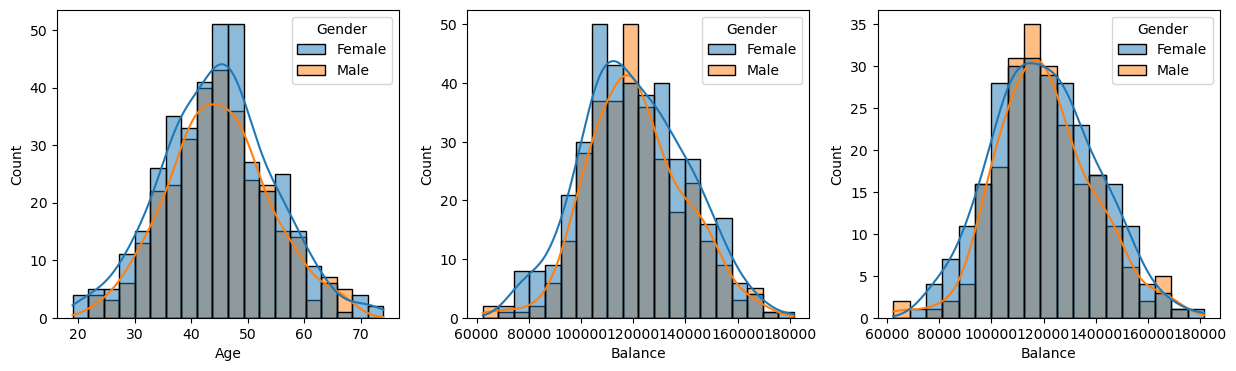

In [191]:
fig, ax = plt.subplots(1,3, figsize = (15,4))
# Adding main plot headingfig.suptitle('Churned Customers Age in Germany v/s Gender', fontsize=15, fontweight='bold')
sns.histplot(x = fil_g_churn['Age'], hue = fil_g_churn['Gender'], bins = 20, kde = True, ax = ax[0])

sns.histplot(x = fil_g_churn['Balance'], hue = fil_g_churn['Gender'], bins = 20, kde = True, ax = ax[1])

sns.histplot(x = fil_g_churn[(fil_g_churn.Age >= 35) & (fil_g_churn.Age <= 53)]['Balance'],
             hue = fil_g_churn[(fil_g_churn.Age >= 35) & (fil_g_churn.Age <= 53)]['Gender'],
             kde = True, ax = ax[2])

<Axes: xlabel='Balance', ylabel='Count'>

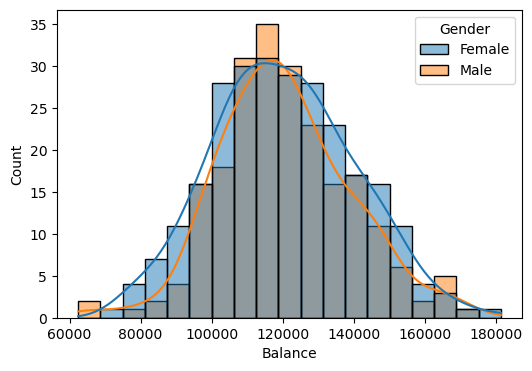

In [192]:
plt.figure(figsize = (6,4))
sns.histplot(x = fil_g_churn[(fil_g_churn.Age >= 35) & (fil_g_churn.Age <= 53) & (fil_g_churn.CreditScore >= 500) & (fil_g_churn.CreditScore <=800)]['Balance'], kde = True, hue = fil_g_churn.Gender)

# France

In [ ]:
f_churn = churn_comp[churn_comp['Geography'] == 'France']
f_churn.head()

In [ ]:
plt.figure(figsize = (4,3))
sns.countplot(x = f_churn['Gender'])

fig, ax = plt.subplots(1,2,figsize = (14,4))

sns.countplot(x = f_churn['credit_bin'].sort_values(ascending = True), ax = ax[0])
sns.countplot(x = f_churn['credit_bin'].sort_values(ascending = True), hue = f_churn['Gender'], ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.1)
plt.show()

In [ ]:
fil_f_churn = f_churn[(f_churn.CreditScore >= 500) & (f_churn.CreditScore <=800)]
fil_f_churn.head()

In [ ]:
fil_f_churn['credit_bin'].value_counts()

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (14,4))
# Adding main plot heading
fig.suptitle('Churned Customers in France v/s Age, Balance & Credit Score', fontsize=25, fontweight='bold')
sns.histplot(x = fil_f_churn['Age'],
             bins = 20, hue = fil_f_churn['credit_bin'], 
             kde = True, ax = ax[0])

sns.histplot(x = fil_f_churn['Balance'], bins = 20, hue = fil_f_churn['credit_bin'], kde = True, ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.1)
plt.show()


fig, ax = plt.subplots(1,2,figsize = (14,4))
# Adding main plot heading
fig.suptitle('Churned Female Customers in France v/s Age, Balance & Credit Score', fontsize=25, fontweight='bold')
sns.histplot(x = fil_f_churn[fil_f_churn['Gender'] == 'Female']['Age'],
             bins = 20, hue = fil_f_churn[fil_f_churn['Gender'] == 'Female']['credit_bin'],
             kde = True, ax = ax[0])

sns.histplot(x = fil_f_churn[fil_f_churn['Gender'] == 'Female']['Balance'],
             bins = 20, hue = fil_f_churn[fil_f_churn['Gender'] == 'Female']['credit_bin'],
             kde = True, ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.1)
plt.show()


fig, ax = plt.subplots(1,2,figsize = (14,4))
# Adding main plot heading
fig.suptitle('Churned Male Customers in France v/s Age, Balance & Credit Score', fontsize=25, fontweight='bold')
sns.histplot(x = fil_f_churn[fil_f_churn['Gender'] == 'Male']['Age'],
             bins = 20, hue = fil_f_churn[fil_f_churn['Gender'] == 'Male']['credit_bin'], 
             kde = True, ax = ax[0])

sns.histplot(x = fil_f_churn[fil_f_churn['Gender'] == 'Male']['Balance'],
             bins = 20, hue = fil_f_churn[fil_f_churn['Gender'] == 'Male']['credit_bin'],
             kde = True, ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.1)
plt.show()

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (15,4))
# Adding main plot headingfig.suptitle('Churned Customers Age in Germany v/s Gender', fontsize=15, fontweight='bold')
sns.histplot(x = fil_f_churn['Age'], hue = fil_f_churn['Gender'], bins = 20, kde = True, ax = ax[0])

sns.histplot(x = fil_f_churn['Balance'], hue = fil_f_churn['Gender'], bins = 20, kde = True, ax = ax[1])

sns.histplot(x = fil_f_churn['Balance'], hue = fil_f_churn['IsActiveMember'], bins = 20, kde = True, ax = ax[2])

# Spain

In [ ]:
s_churn = churn_comp[churn_comp['Geography'] == 'Spain']
s_churn.head()

In [ ]:
plt.figure(figsize = (4,3))
sns.countplot(x = s_churn['Gender'])

fig, ax = plt.subplots(1,2,figsize = (14,4))

sns.countplot(x = s_churn['credit_bin'].sort_values(ascending = True), ax = ax[0])
sns.countplot(x = s_churn['credit_bin'].sort_values(ascending = True), hue = s_churn['Gender'], ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.1)
plt.show()

In [ ]:
fil_s_churn = s_churn[(s_churn.CreditScore >= 500) & (s_churn.CreditScore <=800)]
fil_s_churn.head()

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (14,4))
# Adding main plot heading
fig.suptitle('Churned Customers in Spain v/s Age, Balance & Credit Score', fontsize=25, fontweight='bold')
sns.histplot(x = fil_s_churn['Age'],
             bins = 20, hue = fil_s_churn['credit_bin'], 
             kde = True, ax = ax[0])

sns.histplot(x = fil_s_churn['Balance'], bins = 20, hue = fil_s_churn['credit_bin'], kde = True, ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.1)
plt.show()


fig, ax = plt.subplots(1,2,figsize = (14,4))
# Adding main plot heading
fig.suptitle('Churned Female Customers in Spain v/s Age, Balance & Credit Score', fontsize=25, fontweight='bold')
sns.histplot(x = fil_s_churn[fil_s_churn['Gender'] == 'Female']['Age'],
             bins = 20, hue = fil_s_churn[fil_s_churn['Gender'] == 'Female']['credit_bin'],
             kde = True, ax = ax[0])

sns.histplot(x = fil_s_churn[fil_s_churn['Gender'] == 'Female']['Balance'],
             bins = 20, hue = fil_s_churn[fil_s_churn['Gender'] == 'Female']['credit_bin'],
             kde = True, ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.1)
plt.show()


fig, ax = plt.subplots(1,2,figsize = (14,4))
# Adding main plot heading
fig.suptitle('Churned Male Customers in Spain v/s Age, Balance & Credit Score', fontsize=25, fontweight='bold')
sns.histplot(x = fil_s_churn[fil_s_churn['Gender'] == 'Male']['Age'],
             bins = 20, hue = fil_s_churn[fil_s_churn['Gender'] == 'Male']['credit_bin'], 
             kde = True, ax = ax[0])

sns.histplot(x = fil_s_churn[fil_s_churn['Gender'] == 'Male']['Balance'],
             bins = 20, hue = fil_s_churn[fil_s_churn['Gender'] == 'Male']['credit_bin'],
             kde = True, ax = ax[1])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.subplots_adjust(hspace = 0.4, wspace = 0.1)
plt.show()

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (15,4))
# Adding main plot headingfig.suptitle('Churned Customers Age in Germany v/s Gender', fontsize=15, fontweight='bold')
sns.histplot(x = fil_s_churn['Age'], hue = fil_s_churn['Gender'], bins = 20, kde = True, ax = ax[0])

sns.histplot(x = fil_s_churn['Balance'], hue = fil_s_churn['Gender'], bins = 20, kde = True, ax = ax[1])

sns.histplot(x = fil_s_churn[(fil_s_churn.Age >= 35) & (fil_s_churn.Age <= 53)]['Balance'],
             hue = fil_s_churn[(fil_s_churn.Age >= 35) & (fil_s_churn.Age <= 53)]['Gender'],
             kde = True, ax = ax[2])

# Observations

* Based on the above observation, it is clear that there is no much difference in the customers who churned across geography except for the bank account balance.
* Unfortunately, customers who did not exited and who exited both have similar profiles except for the past complain, indicating high risk of customer churn in the future if any complain arises.
* Grmany has highest churn rate.
* Churned customer profile is the same for all regions except the balance.

1. Customers are aged between 38 - 50 years.
2. Majority of customers are female nad had only 1 product.
3. Credit score is between 600 - 700.
4. Majority customers are inactive.
5. All the customers had complain but their satisfaction score has no impact
6. Customers in Spain & France had 0 balance.
7. Customers in Germany had no 0 balance account but very high balance account of 1 lac to 1.40 lacs

**Churned Customer Profile**

- Female customers aged between 38 - 50 years with credit score of 600-700 who had only 1 product and were not Active members with past complain and **0 balance** in their account tend to churn from the bank in **France & Spain**.

- Female customers aged between 38 - 50 years with credit score of 600-700 who had only 1 product and were not Active members with past complain and balance between **1lac to 1.40 lac** in their account tend to churn from the bank in **Germany**.

# Recommendations

- Targeted promotions and offers for Female customers.
- Cross sell more products to the exiting customers as people with just 1 product tend to churn most.
- Customers who did not churn (loyal customers) have age between 30-40. Focus on providing more services and credit card benefits to these customers so they continue to stay with the bank.
- Incentivise customers having credit score of 600-700 and age between 38-50 by offering more points or offers.
- Focus on customers with 0 Balance in their account as they might also have accounts in competitors banks. Run campaign to retain them or to transact with this bank more which will keep the customer Active with the Bank.
- In Germany, customer service needs to be improved as majority of the customers who exited had no 0 balance account indicating possible lack of or poor customer service. Collect feedback from these customers which is essential to understand the reason for churn here.
- Focus on improving the product offering in Germany.
- Further analyse the type or category of customer complain to identify common complains and fix the issue at the source.
- This will help identify the concern even before it occurs and reduce customer complain and customer touch points.